In [19]:
from preprocessing import test_data_loader
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from model_new import CNN2
from torch.utils.data import DataLoader
from preprocessing import AlexEmbed_test
import tqdm

ImportError: cannot import name 'AlexEmbed_test' from 'preprocessing' (c:\Users\Benlitzie\Documents\GitHub\APS360-Project\preprocessing.py)

In [15]:

def new_dataset(batch_size=1, dire = "alex_embedding_set/test"):
    # Fixed PyTorch random seed for reproducible result
    torch.manual_seed(0)

    t = test_data_loader(batch_size=batch_size, shuffle=False)
    id=0
    for batch in t:
        imgs, labels = batch.values()
        labels = torch.argmax(labels, dim=1)
        np.save(f"{dire}/embed_{id}", imgs.numpy())
        np.save(f"{dire}/label_{id}", labels.numpy())
        id += 1
    

In [16]:
new_dataset()

In [18]:
alexembedt = AlexEmbed_test()

NameError: name 'AlexEmbed_test' is not defined

In [2]:
def show_test_images(n):
    classes = {
        0:"sitting",
        1:"using_laptop",
        2:"hugging",
        3:"sleeping",
        4:"drinking",
        5:"clapping",
        6:"dancing",
        7:"cycling",
        8:"calling",
        9:"laughing",
        10:"eating",
        11:"fighting",
        12:"listening_to_music",
        13:"running",
        14:"texting"
    }

    test_loader = test_data_loader()
    i = 0
    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    for batch in test_loader:
        for image, img_class in zip(batch["image"], batch["img_class"]):
            i += 1
            for x in range(5):
                plt.subplot(n, 5, x + 1 + 5*(i-1))
                plt.imshow(image[x].permute(1, 2, 0))
                plt.title(classes[np.argmax(img_class).item()])
            if i >= n:
                break
        if i >= n:
            break
    plt.show()


TypeError: Invalid shape (6, 6, 256) for image data

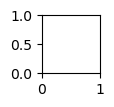

In [3]:
show_test_images(5)

In [ ]:
def count_classes():
    classes = {
        0:"sitting",
        1:"using_laptop",
        2:"hugging",
        3:"sleeping",
        4:"drinking",
        5:"clapping",
        6:"dancing",
        7:"cycling",
        8:"calling",
        9:"laughing",
        10:"eating",
        11:"fighting",
        12:"listening_to_music",
        13:"running",
        14:"texting"
    }
    counts = {
        "sitting":0,
        "using_laptop":0,
        "hugging":0,
        "sleeping":0,
        "drinking":0,
        "clapping":0,
        "dancing":0,
        "cycling":0,
        "calling":0,
        "laughing":0,
        "eating":0,
        "fighting":0,
        "listening_to_music":0,
        "running":0,
        "texting":0
    }
    test_loader = test_data_loader()
    for batch in test_loader:
        for _, img_class in zip(batch["image"], batch["img_class"]):
            counts[classes[np.argmax(img_class).item()]] += 1
    return counts

In [ ]:
def get_test_acc(net):
    if torch.cuda.is_available():
        net.cuda()

    test_loader = test_data_loader()
    softmax = nn.Softmax(dim=1)
    total_test_acc = 0.0
    num_images = 0
    for batch in test_loader:
        for image, img_class in zip(batch["image"], batch["img_class"]):
            num_images += 1
            avg_output = torch.zeros((1,15))
            if torch.cuda.is_available():
                image.cuda()
                img_class.cuda()
                avg_output.cuda()
            for x in range(5):
                avg_output += net(image[x].unsqueeze(0))
            avg_output /= 5
            pred = softmax(avg_output)
            total_test_acc += (np.argmax(pred.detach().cpu(), 1) == np.argmax(img_class.unsqueeze(0).cpu(), 1)).sum().item()
    return total_test_acc / num_images


In [ ]:
#if __name__=="__main__":
#from model_new import CNN
#net = CNN()
#net.load_state_dict(torch.load("./models/bs256_lr0.0001_epoch29", map_location=torch.device('cpu')))
#print(get_test_acc(net))
#print(count_classes())
show_test_images(8)
print("1")